# Clickable USA map with MSE sounding plots
## Suvarchal Cheedela, Brian Mapes, Wei-Ming Tsai, Feb. 2019

In [1]:
import requests
import zipfile
from io import BytesIO as StringIO
import os
import itertools
import shapefile
import pandas as pd
from datetime import datetime
import xarray as xr


from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import metpy.calc as mpcalc
from metpy.units import units
#from metpy.io import get_upper_air_data
import siphon
from siphon.simplewebservice.wyoming import WyomingUpperAir
get_upper_air_data=WyomingUpperAir.request_data 

import holoviews as hv
from holoviews import streams
import ipywidgets as widgets

from MSEplots import plots as mpt
from metpy.calc.thermo import *
from metpy.units import units

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
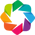

In [3]:
hv.notebook_extension('bokeh')

In [4]:
%matplotlib inline

In [5]:
import logging
logging.getLogger("requests").setLevel(logging.WARNING) # to disable information and warnings from requests library 
np.warnings.filterwarnings('ignore') # ignore warnings from metpy

### A custom coastline function for interactive maps

In [ ]:
def us_coastlines():
    """A utility to create US coast lines"""
    url='http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_county_20m.zip'
    response = requests.get(url)
    with zipfile.ZipFile(StringIO(response.content)) as zf:
        for fname in zf.namelist():
            name, ext = os.path.splitext(fname)
            if ext == '.shp':
                shp = StringIO(zf.read(fname)) 
            elif ext == '.dbf':
                dbf = StringIO(zf.read(fname))             
            else:
                pass
    shpf=shapefile.Reader(shp=shp,dbf=dbf)
    pls=[]
    for shprec in shpf.shapeRecords():
        name_long = u'us_counties'
        lon, lat = map(list, zip(*shprec.shape.points))
        indices = shprec.shape.parts.tolist()
        lat = [lat[i:j] + [float('NaN')] for i, j in zip(indices, indices[1:]+[None])]
        lon = [lon[i:j] + [float('NaN')] for i, j in zip(indices, indices[1:]+[None])]
        lat = list(itertools.chain.from_iterable(lat))
        lon = list(itertools.chain.from_iterable(lon))
        pls.append(hv.Path((lon,lat))(style={'color':'Black'}))
    return hv.Polygons(pls)(style={'color':'White'}).redim.label(
                                x='lon',y='lat').redim.range(lat=(22,50),lon=(-130,-65))

In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

coastline=us_coastlines() # create a map of coast lines
# Gives a lot of warnings I couldn't avoid

### Download station codes and their lon,lat locations, and prepare a datastructure for indexing.

In [6]:
#Download station codes and their locations from text file
r=requests.get('https://weather.rsmas.miami.edu/repository/entry/get/station_codes.txt?entryid=synth%3A1142722f-a386-4c17-a4f6-0f685cd19ae3%3AL3N0YXRpb25fY29kZXMvc3RhdGlvbl9jb2Rlcy50eHQ%3D')
codes=r.content.decode('utf-8').splitlines()

In [7]:
data_codes=[str(code.split()[0]) for code in codes]
data_lats=[float(code.split()[1])+float(code.split()[2][0:2])/100 for code in codes]
data_lons=[-1.0*(float(code.split()[3])+float(code.split()[4][0:2])/100) for code in codes]

In [8]:
#create a dataarray with station codes and their lat lon coordinates
lonlat=[(lo,la) for lo,la in zip(data_lons,data_lats)]
midx = pd.MultiIndex.from_tuples(lonlat,names=('lon','lat')) 
da=xr.DataArray(data_codes,[('lonlat',midx)])

### An interactive US map with stations as points

In [10]:
#Overlay stations on a map
pts=hv.Points((data_lons,data_lats),['lon','lat']).redim.range(lat=(22,50),lon=(-130,-65))
pts=pts(style={'size':10},plot={'width':700,'height':400,'tools':['hover']})

tap_stream=streams.Tap(x=-80.2,y=25.45,source=pts) #create a stream
station_map=coastline*pts
#station_map=pts #without coastline

In [11]:
#station_map #should show station map

### Wrap a function around matplotlib plot, to later add it as to the interactive station map

In [12]:
def energy_plot(station_code='MFL',t=None,entrain=False):
    """A function that returns a matplotlib plot"""
    try:
        dataset=get_upper_air_data(t,station_code)
        p = dataset['pressure'].values
        T = dataset['temperature'].values
        Td = dataset['dewpoint'].values
        Z = dataset['height'].values
        
        q = mixing_ratio(saturation_vapor_pressure(Td*units.degC),p*units.mbar)
        q = specific_humidity_from_mixing_ratio(q)
        # ax=mpt.msed_plots(p,T,q,Z,entrain=entrain,title=station_code+' '+str(t))
        ax=mpt.msed_plots(p,T,q,Z,entrain=entrain)
        
        label.value="Showing {} at {}".format(station_code,t)
    except:
        label.value="No data available at {} for this date {}".format(station_code,t)

### Setup additional interaction through widgets (time, loading status, checkbox for entraining parcels option) 

In [13]:
#setup widgets to interact with energy plot 
dates=pd.date_range(datetime(2013,1,1,0),datetime(2019,1,1,0),freq='D')
label=widgets.Label('')  
sw=widgets.fixed('MFL') 
entrainw=widgets.Checkbox(value=False,description='Entraining Plumes')
tw=widgets.SelectionSlider(options=dates,description="Time",continuous_update=False,layout=widgets.Layout(width='90%'))

### A method that responds to click on the interactive station map

In [14]:
def update_plot(x,y):
    """A call method which will be called when user clicks on the point on the map.
       Routine finds the closest datapoint to the click location and updates the widget.
    """
    if x:
        try:
            #this doesn't work because xarray cannot select nearest location for point data data structutre 
            station_code=str(da.sel(lon=x,lat=y,method='nearest').values)
            label.value=str(station_code)
        except:
            #uses L1 degree distance (absoulte of distance) to find closest location to click
            # below inline function finds the index of the nearest data location to click
            l1dist=lambda x,y:np.argmin([abs(lo-x)+abs(la-y) for lo,la in list(zip(da.lon.values,da.lat.values))])
            
            station_code=str(da[l1dist(x,y)].values)
            stationlonlat=str(da[l1dist(x,y)].lonlat.values)
            label.value='Loading '+str(station_code)+f' (lon,lat: {stationlonlat})'
        else:
            station_code='MFL'+str(abs(da.lon.values-x))
    #label.value='Loading station {} at {}'.format(station_code,str(tw.value))
    sw.value=station_code
    label.value=''

In [15]:
tap_stream.add_subscriber(update_plot) #attach callback method for a tap stream

### Create an output area for all the interactive plots

In [16]:
output_area=widgets.Output() #create a area to stack all interactive plots in one cell

In [17]:
output_area #click on the points on the map to explore the energy mass plot 

Output()

In [18]:
#makes changes to the cell area above, attaches matplotlib plot and widget interaction.
output_area.append_display_data(station_map) #put map in the cell area
with output_area:
     display(widgets.VBox([tw,label,entrainw,widgets.interactive_output(energy_plot,{'station_code':sw,'t':tw,'entrain':entrainw})]))
     #above line attaches energy plot with its time widget